In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Setting things up

Let's load the data and give it a quick look.

In [43]:
df = pd.read_csv("data/apib12tx.csv")

In [46]:
df.describe()

,API12B,PCT_AA,PCT_AI,PCT_AS,PCT_FI,PCT_HI,PCT_PI,PCT_WH,PCT_MR,MEALS,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
count,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,...,6634.000000,7511.000000,4489.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10118.000000
mean,787.467262,6.504172,1.109257,7.154216,2.149602,49.908216,0.504957,29.520467,2.085108,59.667517,...,22.059090,25.723605,23.432168,85.550702,20.058506,24.698537,24.264651,18.515952,11.794935,2.771169
std,104.176630,10.539728,4.082059,12.321782,4.028955,29.159250,1.031627,26.159148,2.939391,29.600844,...,5.839773,6.902056,7.683286,18.622835,17.679325,12.319831,11.020448,12.452289,13.874110,0.754851
min,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,739.000000,1.000000,0.000000,1.000000,0.000000,24.000000,0.000000,5.000000,0.000000,36.000000,...,20.000000,24.000000,20.000000,82.000000,5.000000,16.000000,16.000000,8.000000,3.000000,2.180000
50%,797.000000,3.000000,0.000000,3.000000,1.000000,48.000000,0.000000,22.000000,1.000000,64.000000,...,23.000000,28.000000,26.000000,92.000000,16.000000,26.000000,24.000000,16.000000,6.000000,2.670000
75%,857.000000,8.000000,1.000000,8.000000,3.000000,76.000000,1.000000,51.000000,3.000000,85.000000,...,26.000000,30.000000,29.000000,97.000000,32.000000,33.000000,32.000000,28.000000,16.000000,3.290000
max,998.000000,95.000000,92.000000,96.000000,65.000000,100.000000,18.000000,100.000000,23.000000,100.000000,...,43.000000,46.000000,45.000000,100.000000,100.000000,100.000000,100.000000,100.000000,89.000000,4.880000


## Checking out correlations

Let's start looking at how variables in our dataset relate to each other so we know what to expect when we start modeling.

In [47]:
df.corr()

,API12B,PCT_AA,PCT_AI,PCT_AS,PCT_FI,PCT_HI,PCT_PI,PCT_WH,PCT_MR,MEALS,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
API12B,1.000000,-0.223117,-0.126489,0.362361,0.153552,-0.418466,-0.060199,0.363066,0.210260,-0.528166,...,0.182052,0.254228,0.437987,0.223457,-0.535325,-0.519386,0.011033,0.591692,0.582731,0.652429
PCT_AA,-0.223117,1.000000,-0.067107,-0.049370,0.057254,-0.092423,0.219737,-0.282255,-0.003058,0.182797,...,-0.000674,-0.070089,-0.036594,-0.178875,0.003424,0.149530,0.134386,-0.097386,-0.151995,-0.098450
PCT_AI,-0.126489,-0.067107,1.000000,-0.088917,-0.080058,-0.187081,-0.029631,0.128484,0.054740,0.040794,...,-0.159973,-0.184140,-0.218363,-0.031626,-0.061002,0.113335,0.145105,-0.075846,-0.075958,-0.030800
PCT_AS,0.362361,-0.049370,-0.088917,1.000000,0.232352,-0.363255,0.071994,-0.077984,0.105744,-0.312039,...,0.126658,0.178142,0.251559,-0.004432,-0.271720,-0.252820,-0.213072,0.326789,0.389559,0.370071
PCT_FI,0.153552,0.057254,-0.080058,0.232352,1.000000,-0.142512,0.282081,-0.129342,0.095510,-0.141283,...,0.089452,0.120321,0.214681,0.068215,-0.204777,-0.083519,0.090039,0.263867,0.031945,0.165709
PCT_HI,-0.418466,-0.092423,-0.187081,-0.363255,-0.142512,1.000000,-0.077148,-0.784308,-0.458183,0.746475,...,0.115690,0.069356,0.048252,-0.084089,0.798176,0.520316,-0.268786,-0.685352,-0.602600,-0.797608
PCT_PI,-0.060199,0.219737,-0.029631,0.071994,0.282081,-0.077148,1.000000,-0.116163,0.036753,0.028549,...,0.075881,0.049283,0.019570,-0.029653,-0.052520,0.083561,0.092990,0.009552,-0.081522,-0.017244
PCT_WH,0.363066,-0.282255,0.128484,-0.077984,-0.129342,-0.784308,-0.116163,1.000000,0.329157,-0.695871,...,-0.176037,-0.131902,-0.126703,0.175599,-0.664536,-0.494585,0.286760,0.580454,0.522910,0.683077
PCT_MR,0.210260,-0.003058,0.054740,0.105744,0.095510,-0.458183,0.036753,0.329157,1.000000,-0.381300,...,0.007579,0.056607,-0.053738,0.132515,-0.408829,-0.295447,0.113340,0.378918,0.348351,0.432389
MEALS,-0.528166,0.182797,0.040794,-0.312039,-0.141283,0.746475,0.028549,-0.695871,-0.381300,1.000000,...,0.017383,-0.035894,-0.095275,-0.164411,0.734150,0.710693,-0.079904,-0.785937,-0.754539,-0.872949


The percentage of students enrolled in free/reduced-price lunch programs is often used as a proxy for poverty.

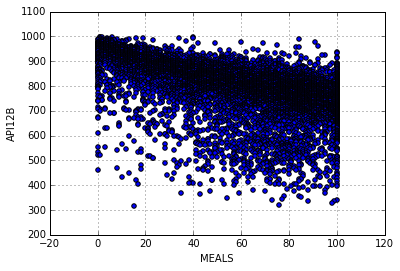

In [48]:
df.plot(kind="scatter", x="MEALS", y="API12B")

Conversely, the education level of a student's parents is often a good predictor of how well a student will do in school.

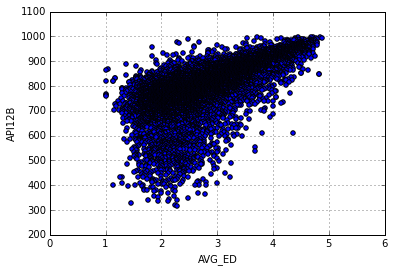

In [49]:
df.plot(kind="scatter", x="AVG_ED", y="API12B")

## Running the regression

Like we did last week, we'll use scikit-learn to run basic single-variable regressions. Let's start by looking at California's Academic Performance index as it relates to the percentage of students, per school, enrolled in free/reduced-price lunch programs.

In [50]:
data = np.asarray(df[['API12B','MEALS']])
data = Imputer().fit_transform(data)
x, y = data[:, 1:], data[:, 0]

In [51]:
lr = LinearRegression() 
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [52]:
# plot the linear regression line on the scatter plot
lr.coef_

array([-1.85881873])

In [53]:
lr.score(x, y)

0.27895982917584949

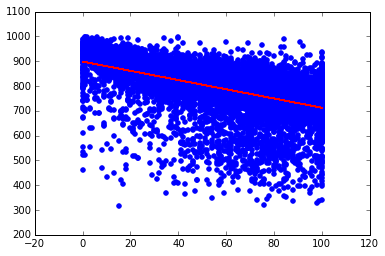

In [54]:
plt.scatter(x, y, color='blue')
plt.plot(x, lr.predict(x), color='red', linewidth=1)

In [55]:
data2 = df[['API12B','MEALS']]
data2.corr()

,API12B,MEALS
API12B,1.000000,-0.528166
MEALS,-0.528166,1.000000


In our naive universe where we're only paying attention to two variables -- academic performance and free/reduced lunch -- we can clearly see that some percentage of schools is overperforming the performance that would be expected of them, taking poverty out of the equation.

A handful, in particular, seem to be dramatically overperforming. Let's look at them:

In [56]:
df[(df['MEALS'] >= 80) & (df['API12B'] >= 90)]

,CHARTER,SNAME,DNAME,CNAME,API12B,ST_RANK,PCT_AA,PCT_AI,PCT_AS,PCT_FI,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
15,NaN,Chin (John Yehall) Elementary,San Francisco Unified,San Francisco,989,10,1,0,88,1,...,21,27,NaN,96,17,47,11,22,3,2.47
51,D,American Indian Public Charter School II,Oakland Unified,Alameda,978,10,5,1,84,0,...,NaN,2,NaN,14,40,14,26,21,0,2.28
161,D,KIPP Raices Academy,Los Angeles Unified,Los Angeles,961,10,2,0,0,0,...,NaN,NaN,NaN,93,14,36,35,8,7,2.59
207,NaN,Lincoln Elementary,Oakland Unified,Alameda,957,10,3,0,87,2,...,24,30,NaN,46,19,37,18,17,8,2.59
221,D,Oakland Charter High,Oakland Unified,Alameda,956,10,5,0,29,0,...,NaN,NaN,5,70,44,35,15,6,0,1.83
445,NaN,Richardson Prep Hi,San Bernardino City Unified,San Bernardino,939,10,11,1,2,1,...,NaN,32,29,76,26,28,22,13,11,2.54
510,D,Synergy Charter Academy,Los Angeles Unified,Los Angeles,935,10,4,0,0,0,...,NaN,NaN,NaN,77,40,28,24,7,1,2.03
542,Y,Sixth Street Prep,Victor Elementary,San Bernardino,933,10,8,1,1,0,...,22,34,NaN,92,36,23,20,9,13,2.38
683,D,KIPP Los Angeles College Preparatory,Los Angeles Unified,Los Angeles,925,10,1,0,2,0,...,NaN,NaN,NaN,99,28,37,27,4,4,2.20
702,D,Rocketship Mateo Sheedy Elementary,Santa Clara County Office of E,Santa Clara,924,10,1,0,1,0,...,24,25,NaN,91,45,24,14,11,7,2.10


Let's look specifically at Solano Avenue Elementary, which has an API of 922 and 80 percent of students being in the free/reduced lunch program. If you were to use the above regression to predict how well Solano would do, it would look like this:

In [57]:
lr.predict(80)

array([ 749.6728627])

With an index of 922, clearly the school is overperforming what our simplified model expects.

## Vanessa's Analysis

1. How are the average parental education level and the percentage of students tested that are eligible for free or reduced price lunch program correlated?

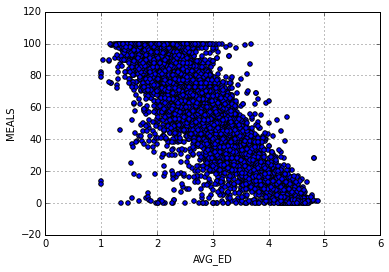

In [58]:
df.plot(kind="scatter", x="AVG_ED", y="MEALS")

In [59]:
data = np.asarray(df[['MEALS','AVG_ED']])
data = Imputer().fit_transform(data)
x, y = data[:, 1:], data[:, 0]

In [60]:
lr = LinearRegression() 
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [61]:
lr.coef_

array([-34.13787004])

In [62]:
lr.score(x, y)

0.75272373408319049

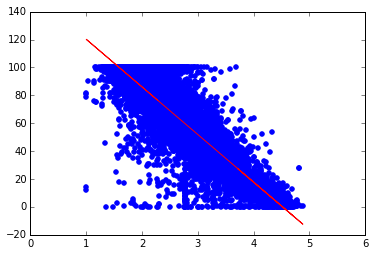

In [63]:
plt.scatter(x, y, color='blue')
plt.plot(x, lr.predict(x), color='red', linewidth=1)

In [64]:
data2 = df[['AVG_ED','MEALS',]]
data2.corr()

,AVG_ED,MEALS
AVG_ED,1.000000,-0.872949
MEALS,-0.872949,1.000000


In [65]:
lr.predict(4)

array([ 17.71785139])

2. Multiple regression

In [66]:
data = np.asarray(df[["MEALS","API12B","AVG_ED"]].fillna(0)) #convert the dataframe to a nparray
x, y = data[:, 1:], data[:, 0] #assign the values to variables and reshape the data
data

array([[   1.  ,  998.  ,    4.72],
       [   6.  ,  998.  ,    4.44],
       [  40.  ,  998.  ,    3.71],
       ..., 
       [  98.  ,  330.  ,    1.45],
       [  76.  ,  321.  ,    2.24],
       [  15.  ,  317.  ,    2.28]])

In [67]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [68]:
m = lr.coef_
b = lr.intercept_

In [69]:
lr.score(x,y)

0.65692039171260352

Let's search for a school with a high percentage of students tested that are eligible for free or reduced price lunch program, a high API score and a low average parental education level.

In [70]:
highlevel = df[(df['MEALS'] >= 90) & (df['API12B'] >= 900) & (df["AVG_ED"] <= 3)]
highlevel

,CHARTER,SNAME,DNAME,CNAME,API12B,ST_RANK,PCT_AA,PCT_AI,PCT_AS,PCT_FI,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
51,D,American Indian Public Charter School II,Oakland Unified,Alameda,978,10,5,1,84,0,...,NaN,2,NaN,14,40,14,26,21,0,2.28
161,D,KIPP Raices Academy,Los Angeles Unified,Los Angeles,961,10,2,0,0,0,...,NaN,NaN,NaN,93,14,36,35,8,7,2.59
445,NaN,Richardson Prep Hi,San Bernardino City Unified,San Bernardino,939,10,11,1,2,1,...,NaN,32,29,76,26,28,22,13,11,2.54
510,D,Synergy Charter Academy,Los Angeles Unified,Los Angeles,935,10,4,0,0,0,...,NaN,NaN,NaN,77,40,28,24,7,1,2.03
683,D,KIPP Los Angeles College Preparatory,Los Angeles Unified,Los Angeles,925,10,1,0,2,0,...,NaN,NaN,NaN,99,28,37,27,4,4,2.20
702,D,Rocketship Mateo Sheedy Elementary,Santa Clara County Office of E,Santa Clara,924,10,1,0,1,0,...,24,25,NaN,91,45,24,14,11,7,2.10
865,NaN,Middle College High,San Bernardino City Unified,San Bernardino,916,10,9,1,1,2,...,NaN,NaN,22,85,22,29,30,14,5,2.51
939,NaN,Design Science Early College High,Fresno Unified,Fresno,913,10,7,0,18,0,...,NaN,NaN,29,95,18,31,35,8,8,2.56
1054,D,Futuro College Preparatory Elementary,Los Angeles Unified,Los Angeles,908,9,0,0,0,0,...,32,NaN,NaN,98,28,29,31,8,5,2.32
